In [1]:
from Game import *

Version:  0.3.07


## TTT

In [2]:
def initial_state():
    return Board(3,3)

def count_pieces(state):
    count=0
    for location in range(9):
        if state[location]!=0:
            count=count+1
            
    return count

def row(state,location):
    r,c=state.rc_from_index(location)
    return r
def col(state,location):
    r,c=state.rc_from_index(location)
    return c

def valid_moves(state,player):
    
    moves=[]
    
    if count_pieces(state)<9:  # placement - temporaily set to 9 to behave like ttt
        # placement
        for location in range(9): 
            if state[location]==0:
                moves.append(location)
    else:
        # sliding
        for start in range(9):
            if state[start]!=player:
                continue

            rs,cs=row(state,start),col(state,start)

            for location in range(9):
                end=None

                r,c=row(state,location),col(state,location)

                if state[location]==0:

                    if r-rs==1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==-1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==0 and c-cs==1:  # horizontal
                        end=location
                    if r-rs==0 and c-cs==-1:  # horizontal
                        end=location
                    if r-rs==1 and c-cs==1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==1:  # diagonal
                        end=location

                    if not end is None:
                        moves.append([start,end])
                pass

        
    return moves
    
    
def update_state(state,player,move):
    if isinstance(move,int):  # placement
        new_state=state
        new_state[move]=player
        
    else:  # sliding
        start,end=move
        new_state=state
        new_state[start]=0
        new_state[end]=player
        
    return new_state

def win_status(state,player):
    # 0  1  2 
    # 3  4  5 
    # 6  7  8 

    if player==1:
        other_player=2
    else:
        other_player=1
    
    if state[0]==state[1]==state[2]==player:
        return "win"
    if state[3]==state[4]==state[5]==player:
        return "win"
    if state[6]==state[7]==state[8]==player:
        return "win"
    if state[0]==state[3]==state[6]==player:
        return "win"
    if state[1]==state[4]==state[7]==player:
        return "win"
    if state[2]==state[5]==state[8]==player:
        return "win"
    if state[0]==state[4]==state[8]==player:
        return "win"
    if state[6]==state[4]==state[2]==player:
        return "win"
    
    if not valid_moves(state,other_player):
        return "stalemate"
    
    return None

def show_state(state,player):
    print(state)

## Agents

In [3]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)

random_agent=Agent(random_move)

def human_move(state,player):
    print("Player ", player)
    valid_move=False
    while not valid_move:
        move=int(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move
human_agent=Agent(human_move)


## Robot Code

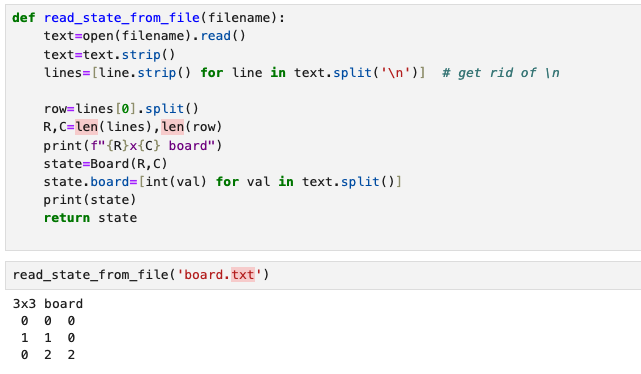

- Edit a file called, say, board.txt
- Make the file look like (or whatever for your game):

<pre>
0 0 0
1 1 0
0 2 2
</pre>

In [13]:
state=read_state_from_file("board.txt")

3x3 board
 0  0  0 
 1  1  0 
 0  2  2 



## Main Robot Code

In [1]:
import ijson   # install with pip install ijson on both laptop and robot
from Game.tables import make_immutable,str2table

class SmallTable(object):

    def __init__(self,filename):
        self.filename=filename

    def __getitem__(self, key):
        key=make_immutable(key)
        with open(self.filename, "rb") as f:
            for record in ijson.items(f, str(key)):
                return str2table(record)

        raise KeyError

    def __contains__(self, key):
        keyi=make_immutable(key)
        try:
            value=self[keyi]
            return True
        except KeyError:
            print(key)
            print(keyi.__repr__())
            return False


def get_move(state,player):
    if player==1:
        Q=SmallTable("TTT Q1 Table.json")
    else:
        Q=SmallTable("TTT Q2 Table.json")

    if state not in Q:
        print("State not in the table: ",state)
        move=random_move(state,player)
    else:
        move=top_choice(Q[state])

    return move

Version:  0.3.07


In [22]:
read_state=read_state_from_file

In [23]:
def make_move(state,player,move):
    print("Making move ",move)
    

In [24]:
player=1 # or player=2 depending on which you want
state=read_state("board.txt") # read the pieces, and construct the state
move=get_move(state,player) # replace with minimax,skitles, Q, etc...
make_move(state,player,move) # actually move the pieces

3x3 board
 0  0  0 
 1  1  0 
 0  2  2 

{0: 0.24371516382550673, 1: -0.5910850625060913, 2: -0.535952734529757, 5: 0.9999999999999999, 6: 0.8999999998564551}
Making move  5
